# Stock Market Analysis - Apple Inc.

## Introduction
In the dynamic landscape of financial markets, understanding the historical trends and patterns of stock prices is crucial for making informed investment decisions. This project delves into the exploratory data analysis (EDA) of Apple Inc.'s stock prices over the past five years. Through the lens of Python programming and data analysis libraries, we aim to uncover insights, trends, and relationships within the dataset to gain a deeper understanding of Apple's stock performance.

We will follow a systematic approach encompassing several key stages:
1. Objectives
2. Data Collection
3. Check and Clean
4. Feature Engineering, Data Exploration and Analysis
5. Hypothesis Testing
6. Conclusion

## Objectives
Looking to answer the following questions along the way:
1. What was the change in the price of the stock over time?
2 What was the moving average of stock?
3.  What was the daily return of the stock on average
4. What is the distribution of daily returns?
5. How much is the risk value of investing in Apple Inc. stocks?  

In [1]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd

from scipy import stats
import scipy as scipy
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Data Collection:
* Utilize  Yahoo Finance data source to gather historical stock price data for Apple INC.
* Use libraries like pandas or yfinance to fetch the data into a DataFrame.

In [2]:
# Fetch Apple INC. stock price data with yfinance
start = '2019-01-01'
end = '2023-12-31'
df_apple = yf.download('AAPL',start=start,end=end)
df_apple.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.845047,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.075394,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.530048,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.450970,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.126774,164101200


In [3]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [4]:
# Save dataset into a csv file
# df_apple.to_csv("DATA/stock_price_data_apple_inc.csv")

## Check and Clean 

In [5]:
# Load dataset from savsd csvs file
df_apple = pd.read_csv("DATA/stock_price_data_apple_inc.csv",index_col='Date')
df_apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.845036,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.075397,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.530048,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.450977,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.126762,164101200


In [6]:
# Insights of dataset
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2019-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8+ KB


In [7]:
# Convert Date column to datetime dtype
df_apple['Date'] = pd.to_datetime(df_apple.index,yearfirst=True)

In [8]:
df_apple.describe()

,Open,High,Low,Close,Adj Close,Volume,Date
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258
mean,122.905654,124.320123,121.600564,123.031085,121.413824,1.015904e+08,2021-06-30 18:48:38.918918912
min,35.994999,36.430000,35.500000,35.547501,34.075397,2.404830e+07,2019-01-02 00:00:00
25%,76.863749,77.998749,76.109377,77.379377,75.294867,6.803012e+07,2020-04-01 06:00:00
50%,134.794998,136.000000,133.330002,134.614998,132.488831,8.861740e+07,2021-06-30 12:00:00
75%,159.730000,162.119999,157.709999,159.665001,158.011349,1.189786e+08,2022-09-28 18:00:00
max,198.020004,199.619995,197.000000,198.110001,197.857529,4.265100e+08,2023-12-29 00:00:00
std,46.512681,46.936453,46.091299,46.527387,46.758670,5.261087e+07,NaN


##  Feature Engineering, Data Exploration and Analysis

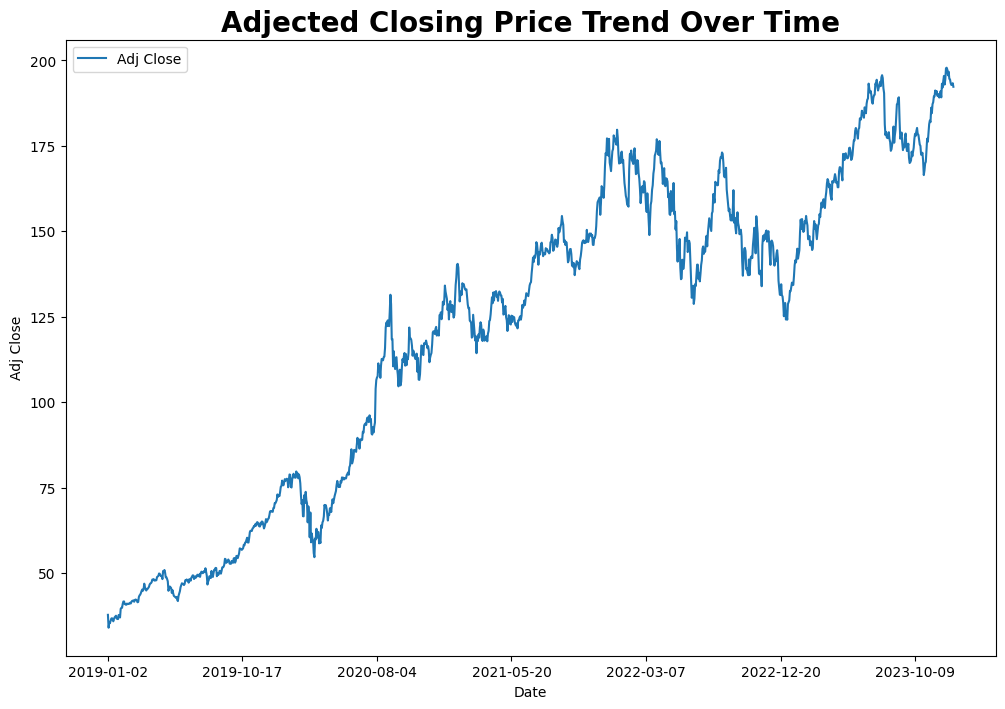

In [9]:
# Plot of Adj Close Over Time
fig,ax = plt.subplots(figsize=(12,8))
df_apple['Adj Close'].plot(ax=ax)
ax.set(xlabel="Date", ylabel="Adj Close")
plt.title(label="Adjected Closing Price Trend Over Time",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.legend()
plt.show()

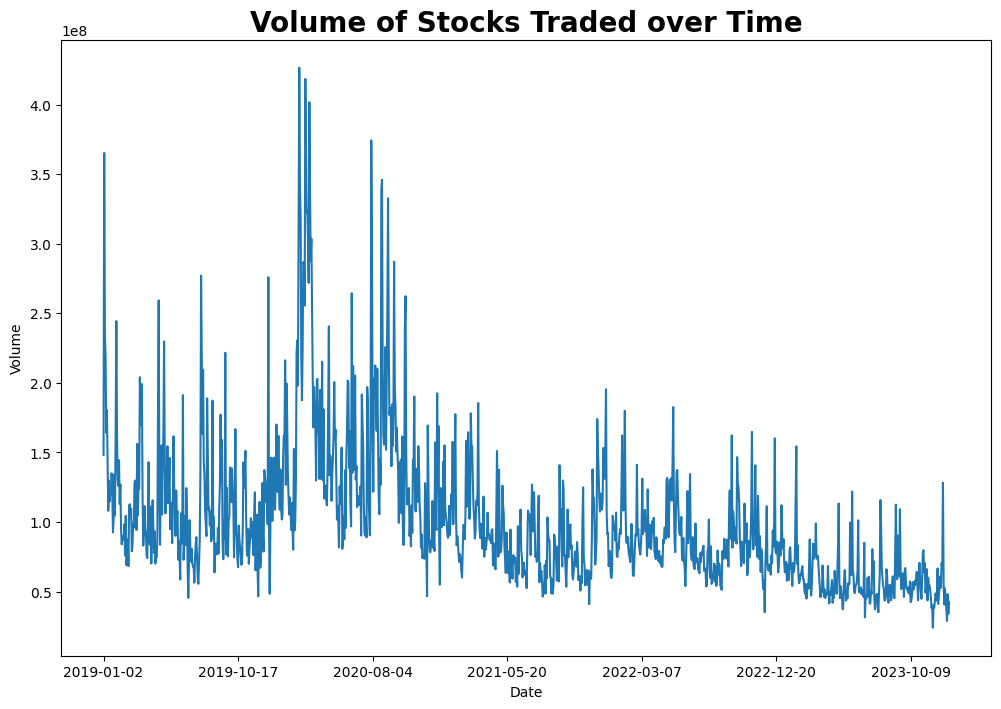

In [10]:
# Plot of Volume Over Time
fig,ax = plt.subplots(figsize=(12,8))
df_apple['Volume'].plot(ax=ax)
ax.set(xlabel='Date', ylabel='Volume')
plt.title(label="Volume of Stocks Traded over Time",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

#### "A moving average is a technique that can be used to smooth out time series data to reduce the “noise” in the data and more easily identify patterns and trends."
Moving Average plots for weekly, monthly and 3 months intervals compared to initial dataset.

In [11]:
day_ma = [7,30,90]
for ma in day_ma:
    column_name = "Moving Average for %s Days" %(str(ma))
    df_apple[column_name] = df_apple['Adj Close'].rolling(window=ma).mean()

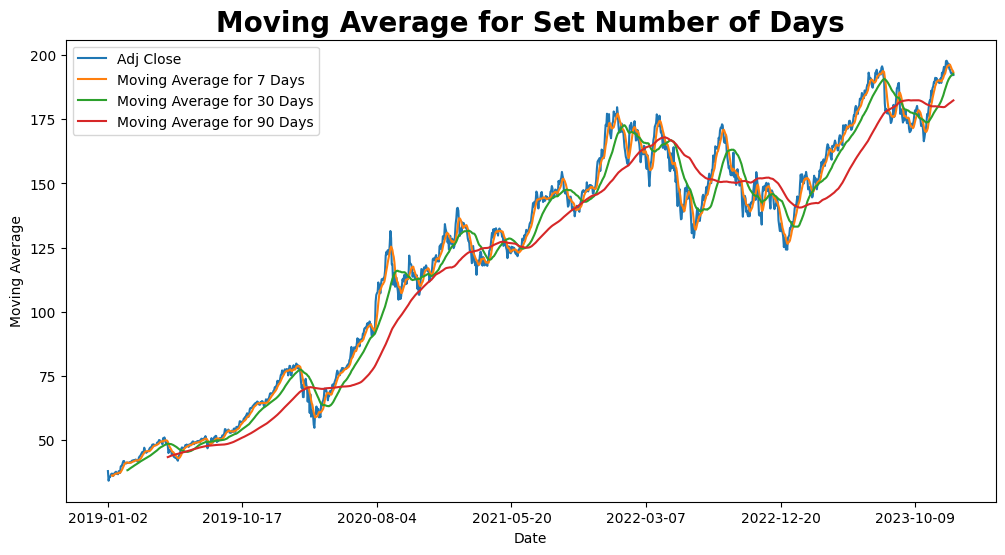

In [12]:
# Plot the Moving Average for set of days

fig,ax = plt.subplots(figsize=(12,6)) 
df_apple[['Adj Close','Moving Average for 7 Days',
    'Moving Average for 30 Days',
    'Moving Average for 90 Days']].plot(ax=ax)
plt.title(label="Moving Average for Set Number of Days",
          fontdict={'fontsize':20,'fontweight':'bold'})
ax.set(xlabel='Date', ylabel='Moving Average')
plt.show()

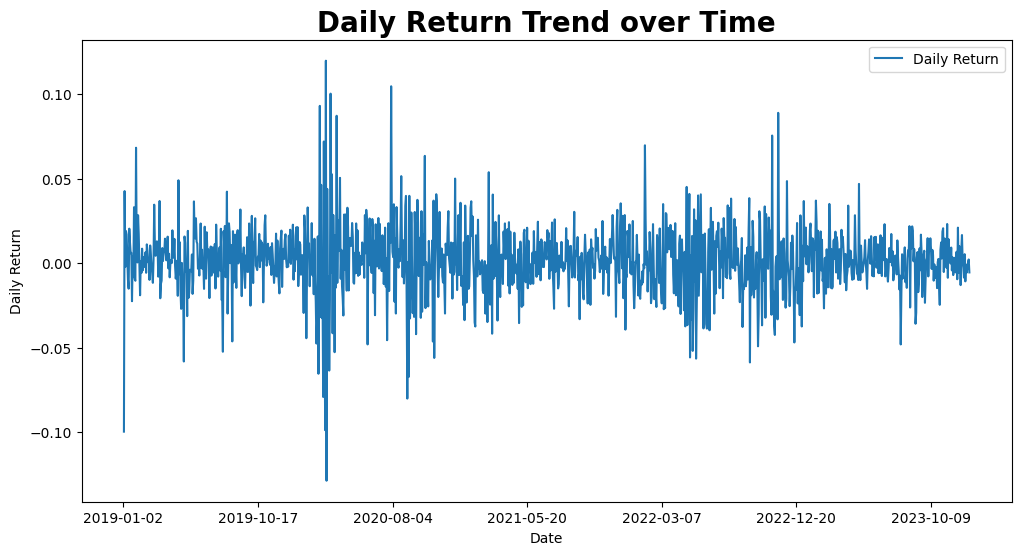

In [13]:
# Compute daily return
df_apple['Daily Return'] = df_apple['Adj Close'].pct_change()

# Plot daily return
fig,ax = plt.subplots(figsize=(12,6))
df_apple['Daily Return'].plot(ax=ax)
ax.set(xlabel='Date', ylabel='Daily Return')
plt.title(label="Daily Return Trend over Time",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


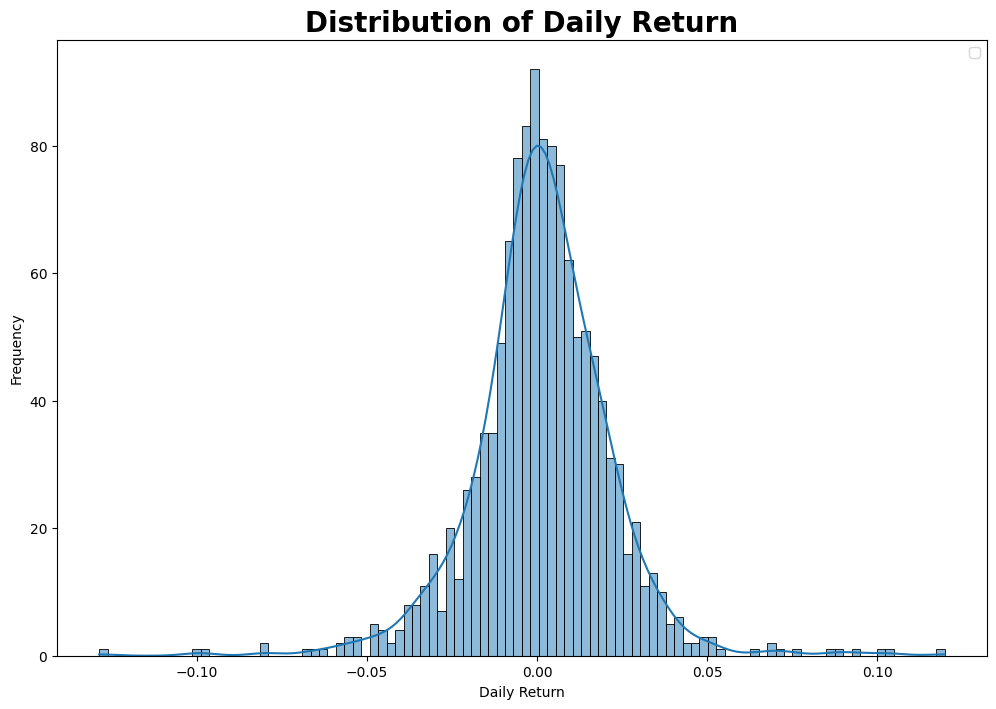

In [14]:
# Histogram plot of daily returns

fig,ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df_apple,x='Daily Return',
            ax=ax, bins=100, kde=True)
ax.set(xlabel='Daily Return',ylabel='Frequency')
plt.title(label="Distribution of Daily Return",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.legend()
plt.show()

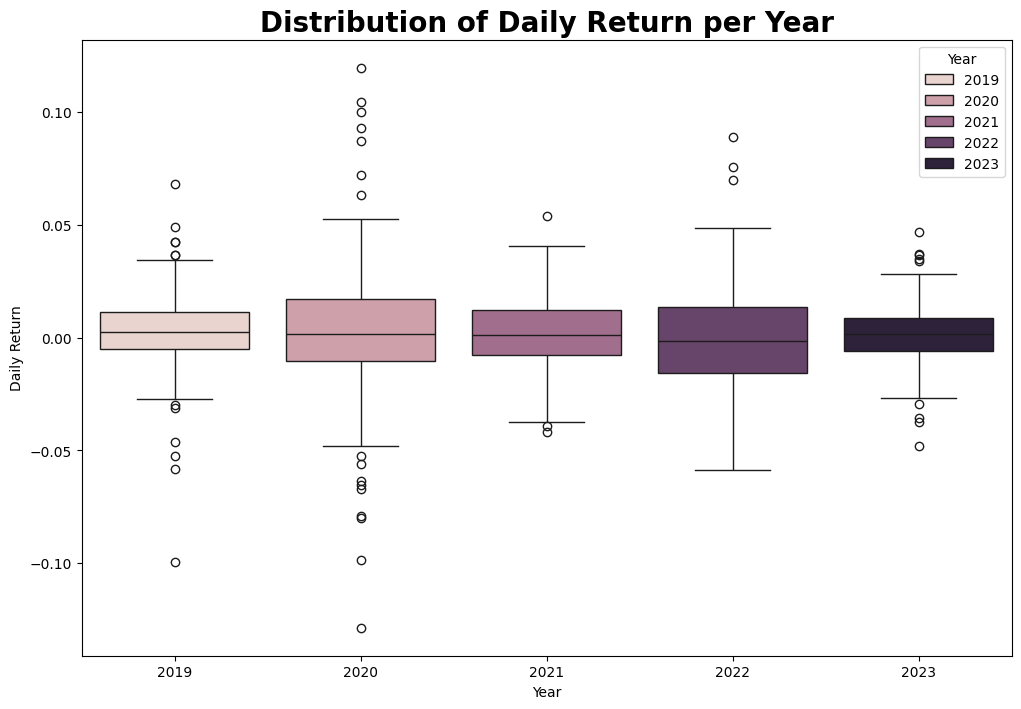

In [15]:
# Histogram plot of daily returns Per Year

# Create year column
df_apple['Year'] = df_apple['Date'].dt.year

fig,ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=df_apple,x='Year',y='Daily Return',
            hue='Year',ax=ax)
plt.title(label="Distribution of Daily Return per Year",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

In [16]:
# Drop null values from dataset
df_apple.dropna(axis=0,inplace=True)

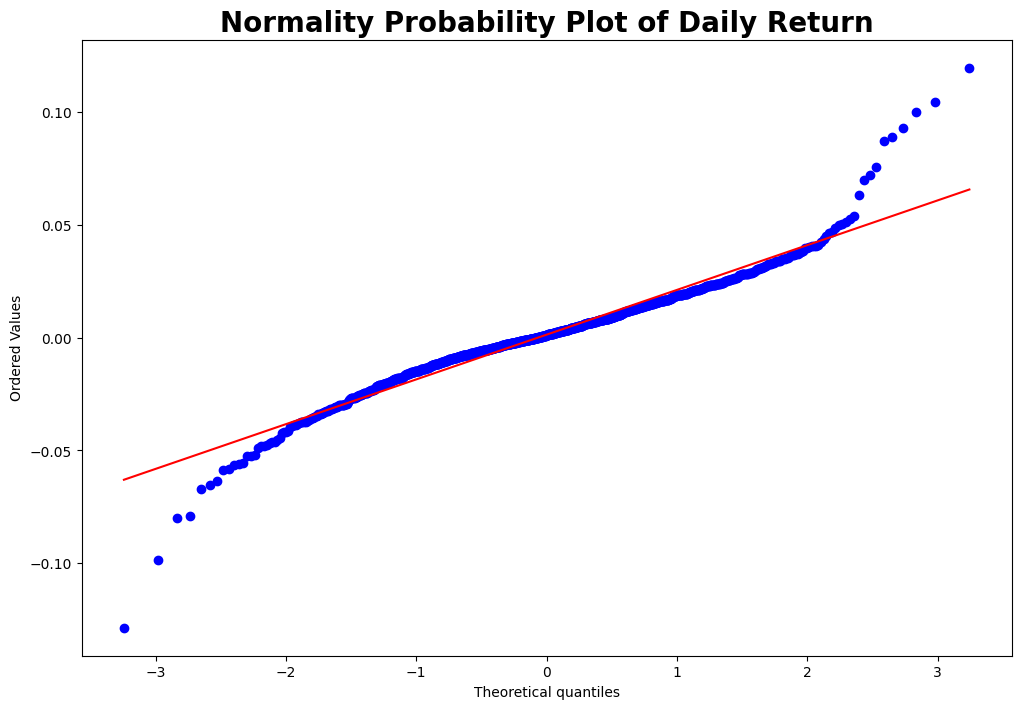

In [17]:
# Normality Probability plot

fig,ax = plt.subplots(figsize=(12,8))
stats.probplot(x=df_apple['Daily Return'],plot=ax,dist=stats.norm)
plt.title(label="Normality Probability Plot of Daily Return",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

## Hypothesis Testing 

#### H0 = Daily Return is normally distributed
#### H1 = Daily Return is not normally distributed
#### Confidence Level = 95%

In [18]:
# Shapiro Wilk Test

test_stat, p_value = stats.shapiro(x=df_apple['Daily Return'])

if p_value > 0.5:
    print("The distribution of Daily Return is likely normal(fail to reject H0 )")
else:
    print("The distribution of Daily Return is likely not normal(reject H0 )")
    

The distribution of Daily Return is likely not normal(reject H0 )


In [19]:
# Expected return
expected_return = df_apple["Daily Return"].mean()

# Compute risk
risk = df_apple["Daily Return"].std()

print(f"The daily expected return is {expected_return:.4f}")
print(f"The amount at risk daily is {risk:.4f}")


The daily expected return is 0.0014
The amount at risk daily is 0.0204


## Conclusion

### Key Insights from Apple Inc.'s Stock Analysis

- **Adjusted Stock Closing Price Trend**: The adjusted stock closing price for Apple Inc. exhibited an overall increasing trend over the past five years, albeit with intermittent drops. This suggests a generally positive trajectory in the company's stock value, punctuated by occasional market corrections.

- **Stock Volume Traded**: Interestingly, the volume of stock traded showed a declining trend over the same period. This divergence between price movement and trading volume could indicate shifts in investor sentiment or changes in market dynamics.

- **Moving Averages Comparison**: Analyzing moving averages, including weekly, monthly, and three-month periods, revealed that these averages closely tracked the daily adjusted stock closing prices. This indicates a consistent and stable trend in Apple's stock performance across various timeframes.

- **Distribution of Daily Returns**: Daily returns for the years 2020 and 2022 displayed a wider distribution compared to 2019, 2021, and 2023. This variation suggests increased volatility or fluctuations in the market during those years, potentially influenced by macroeconomic events or company-specific factors.

- **Normality Assessment**: Analysis using normality probability plots and the Shapiro-Wilk Test indicated that the distribution of daily returns is likely non-normal. This implies that traditional statistical methods assuming normality may not be appropriate for modeling Apple Inc.'s stock returns accurately.

- **Risk Metrics**: The daily expected return was calculated to be 0.0014, indicating the average return investors can anticipate on a daily basis. Furthermore, the amount at risk daily, estimated at 0.0204, highlights the potential downside risk associated with holding Apple Inc.'s stock.

These insights provide valuable information for investors and analysts seeking to understand the dynamics of Apple Inc.'s stock performance and make informed decisions regarding investment strategies and risk management.